In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot, mannwhitneyu
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# Load dataset
df = pd.read_csv('BankChurners.csv')

In [22]:
#Q1)) Feature Classification
column_types = {
    "CLIENTNUM": "Nominal",
    "Attrition_Flag": "Nominal",
    "Customer_Age": "Ratio",
    "Gender": "Nominal",
    "Dependent_count": "Ratio",
    "Education_Level": "Ordinal",
    "Marital_Status": "Nominal",
    "Income_Category": "Ordinal",
    "Card_Category": "Nominal",
    "Months_on_book": "Ratio",
    "Total_Relationship_Count": "Ratio",
    "Months_Inactive_12_mon": "Ratio",
    "Contacts_Count_12_mon": "Ratio",
    "Credit_Limit": "Ratio",
    "Total_Revolving_Bal": "Ratio",
    "Avg_Open_To_Buy": "Ratio",
    "Total_Amt_Chng_Q4_Q1": "Ratio",
    "Total_Trans_Amt": "Ratio",
    "Total_Trans_Ct": "Ratio",
    "Total_Ct_Chng_Q4_Q1": "Ratio",
    "Avg_Utilization_Ratio": "Ratio"
}
print("Feature Classification:", column_types)
#     NOMINAL
# CLIENTNUM: Unique identifier for each customer.
# Attrition_Flag: Status of customer churn (Attrited vs. Existing).
# Gender: Male or Female.
# Marital_Status: Marital status categories like Single, Married, Divorced.
# Card_Category: Type of credit card (e.g., Blue, Silver, Gold, Platinum).
#     ORDINAL
# Education_Level: Ordered educational levels such as Uneducated, High School, Graduate, etc.
# Income_Category: Ordered income ranges (e.g., Less than $40K, $40K - $60K, etc.).
#     RATIO
# Customer_Age: Age in years, with a meaningful zero.
# Dependent_count: Number of dependents, with a true zero indicating no dependents.
# Months_on_book: Number of months the customer has been with the bank.
# Total_Relationship_Count: Number of bank products held by the customer.
# Months_Inactive_12_mon: Months of inactivity in the last 12 months.
# Contacts_Count_12_mon: Number of contacts in the last 12 months.
# Credit_Limit: Credit card limit.
# Total_Revolving_Bal: Total revolving balance on the credit card.
# Avg_Open_To_Buy: Average open-to-buy credit line in the last 12 months.
# Total_Amt_Chng_Q4_Q1: Change in transaction amount from Q4 to Q1.
# Total_Trans_Amt: Total transaction amount in the last 12 months.
# Total_Trans_Ct: Total transaction count in the last 12 months.
# Total_Ct_Chng_Q4_Q1: Change in transaction count from Q4 to Q1.
# Avg_Utilization_Ratio: Average credit utilization ratio.

Feature Classification: {'CLIENTNUM': 'Nominal', 'Attrition_Flag': 'Nominal', 'Customer_Age': 'Ratio', 'Gender': 'Nominal', 'Dependent_count': 'Ratio', 'Education_Level': 'Ordinal', 'Marital_Status': 'Nominal', 'Income_Category': 'Ordinal', 'Card_Category': 'Nominal', 'Months_on_book': 'Ratio', 'Total_Relationship_Count': 'Ratio', 'Months_Inactive_12_mon': 'Ratio', 'Contacts_Count_12_mon': 'Ratio', 'Credit_Limit': 'Ratio', 'Total_Revolving_Bal': 'Ratio', 'Avg_Open_To_Buy': 'Ratio', 'Total_Amt_Chng_Q4_Q1': 'Ratio', 'Total_Trans_Amt': 'Ratio', 'Total_Trans_Ct': 'Ratio', 'Total_Ct_Chng_Q4_Q1': 'Ratio', 'Avg_Utilization_Ratio': 'Ratio'}


In [38]:
#Q2)) Check for missing values and data quality issues
print("Missing Values:\n", df.isnull().sum())

# Potential data quality issues could include:

# Missing values: Certain columns may contain missing or NaN values, especially in categorical fields like Education_Level and Income_Category. These can be handled by filling with the most common category (mode) or removing rows/columns with excessive missing values.
# Inconsistent formats: Categorical data may have inconsistent formatting (e.g., “M” vs “Male” or capitalization inconsistencies). This can be resolved by standardizing format.
# Outliers: Extreme values in features like Credit_Limit or Total_Trans_Amt can distort analysis. Outlier handling involves either capping or removing extreme values based on thresholds like 1.5 or 3 times the IQR.

Missing Values:
 CLIENTNUM                       0
Attrition_Flag                  0
Customer_Age                    0
Gender                          0
Dependent_count                 0
Education_Level                 0
Marital_Status                  0
Unnamed: 7                  10127
Card_Category                   0
Months_on_book                  0
Total_Relationship_Count        0
Months_Inactive_12_mon          0
Contacts_Count_12_mon           0
Credit_Limit                    0
Total_Revolving_Bal             0
Avg_Open_To_Buy                 0
Total_Amt_Chng_Q4_Q1            0
Total_Trans_Amt                 0
Total_Trans_Ct                  0
Total_Ct_Chng_Q4_Q1             0
Avg_Utilization_Ratio           0
Age_to_Transaction_Ratio        0
Credit_Utilization              0
dtype: int64


In [24]:
#Q3)) Summary Statistics
# Calculate central tendency and spread for numerical columns
central_tendency = df.describe().T[['mean', '50%']]  # Mean and median (50%)
spread = df.describe().T[['std', 'min', 'max']]  # Standard deviation, min, and max

# Combine central tendency and spread into one DataFrame
summary_stats = pd.concat([central_tendency, spread], axis=1)
summary_stats.columns = ['Mean', 'Median', 'Std Dev', 'Min', 'Max']

print("Central Tendency and Spread:\n", summary_stats)

# The best measures of central tendency for each feature depend on the feature type:
# For numerical features (e.g., Customer_Age, Credit_Limit, Total_Trans_Amt), the mean and median are good central tendency indicators. The standard deviation and range are effective measures of spread for numerical features.
# For categorical features (e.g., Education_Level, CQard_Category), the mode is the best measure of central tendency.

Central Tendency and Spread:
                                   Mean        Median       Std Dev  \
CLIENTNUM                 7.391776e+08  7.179264e+08  3.690378e+07   
Customer_Age              4.632537e+01  4.600000e+01  8.015036e+00   
Dependent_count           2.346203e+00  2.000000e+00  1.298908e+00   
Unnamed: 7                         NaN           NaN           NaN   
Months_on_book            3.592841e+01  3.600000e+01  7.986416e+00   
Total_Relationship_Count  3.812580e+00  4.000000e+00  1.554408e+00   
Months_Inactive_12_mon    2.341167e+00  2.000000e+00  1.010622e+00   
Contacts_Count_12_mon     2.455317e+00  2.000000e+00  1.106225e+00   
Credit_Limit              7.882309e+03  4.549000e+03  7.217091e+03   
Total_Revolving_Bal       1.162814e+03  1.276000e+03  8.149873e+02   
Avg_Open_To_Buy           7.469140e+03  3.474000e+03  9.090685e+03   
Total_Amt_Chng_Q4_Q1      7.599407e-01  7.360000e-01  2.192068e-01   
Total_Trans_Amt           4.404086e+03  3.899000e+03  3.3971

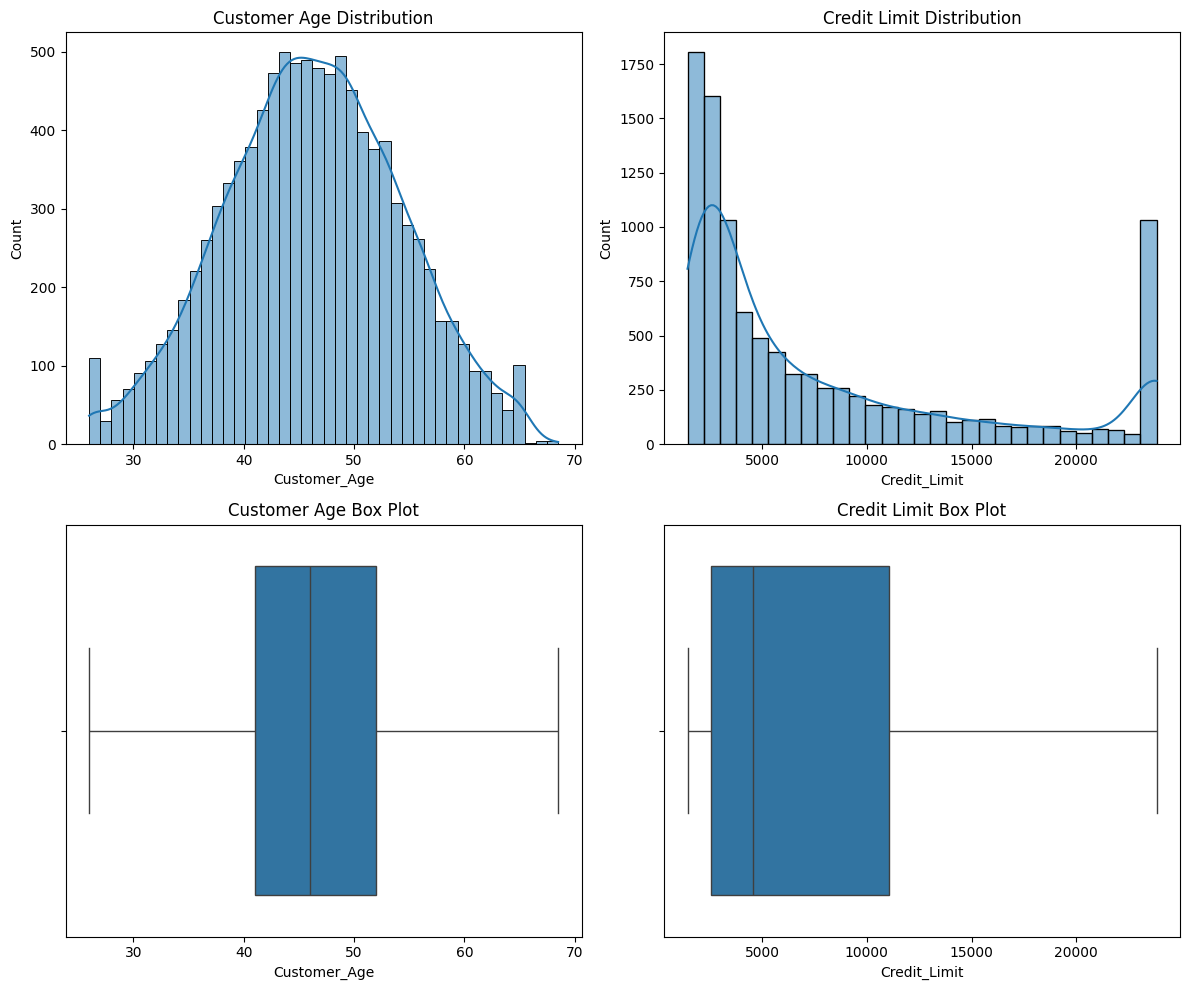

Number of outliers in Customer Age: 0
Number of outliers in Credit Limit: 0


In [45]:
#Q4)) Visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# Customer_Age plots
sns.histplot(df['Customer_Age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Customer Age Distribution')
sns.boxplot(x=df['Customer_Age'], ax=axes[1, 0])
axes[1, 0].set_title('Customer Age Box Plot')
# Credit_Limit plots
sns.histplot(df['Credit_Limit'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Credit Limit Distribution')
sns.boxplot(x=df['Credit_Limit'], ax=axes[1, 1])
axes[1, 1].set_title('Credit Limit Box Plot')

plt.tight_layout()
plt.show()

def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers.count()

# Count outliers in specific columns
customer_age_outliers = count_outliers(df['Customer_Age'])
credit_limit_outliers = count_outliers(df['Credit_Limit'])

print(f'Number of outliers in Customer Age: {customer_age_outliers}')
print(f'Number of outliers in Credit Limit: {credit_limit_outliers}')

# Distribution Types Summary:
# Normal Distribution: Variables like Customer_Age and Credit_Limit appear approximately normally distributed, shown by symmetric, bell-shaped histograms.
# Right-Skewed Distribution: Features like Total_Trans_Amt, Total_Revolving_Bal, and Avg_Utilization_Ratio show right skewness, indicating many lower values with a few high extremes.
# Uniform Distribution: Some categorical features, such as Gender and Attrition_Flag, have roughly uniform distributions, showing balanced counts.
# Bimodal Distribution: Certain variables, if observed, could show bimodal trends, suggesting two main groups within the data.
# Scaling the visualizations (e.g., log transformation for skewed data) can provide clearer insights into these distributions.

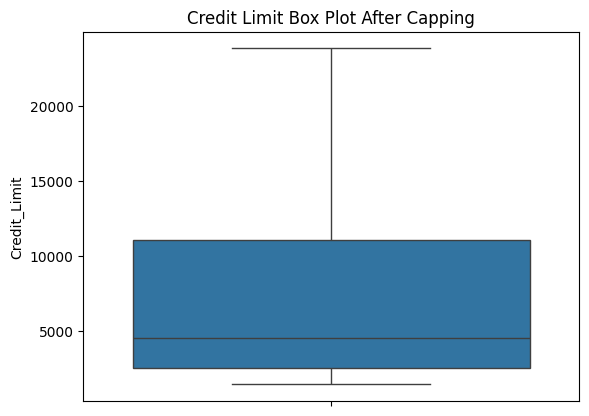

In [26]:
#Q5)) Outlier Treatment for 'Customer_Age' and 'Credit_Limit'
for column in ['Customer_Age', 'Credit_Limit']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

sns.boxplot(df['Credit_Limit'])
plt.title("Credit Limit Box Plot After Capping")
plt.show()

# Outlier Adjustment Steps:
# Detect: Identify outliers using the IQR method for each numeric feature.
# Evaluate: Check if outliers are meaningful extremes or data errors.
# Cap Values: Winsorize extreme values within acceptable limits.
# Transform: Apply log or square root transformations to reduce skew.
# Remove/Impute: Drop or replace erroneous outliers with central values.
# Recheck: Visualize adjusted distributions to confirm effectiveness.

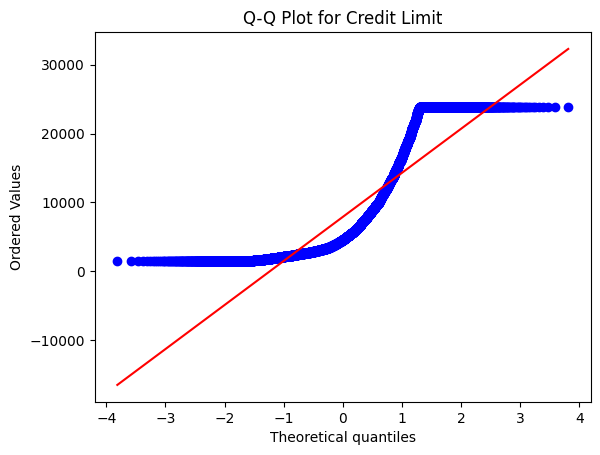

In [27]:
#Q6)) Normal Probability Plot (Q-Q Plot)
probplot(df['Credit_Limit'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Credit Limit")
plt.show()

# The Q-Q plot shows that the "Credit Limit" variable is not normally distributed. 
# The "S" shape indicates heavy tails, with more extreme values than a normal distribution. 
# The flat sections suggest many high outliers in the upper range. Overall, the distribution is skewed and has significant outliers.

In [28]:
# Correlation Analysis - Only include numeric columns
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
correlations = numeric_df.corr()

# Display correlations of Customer_Age and Credit_Limit with other numeric columns
print("Correlation with Customer_Age:\n", correlations['Customer_Age'])
print("Correlation with Credit_Limit:\n", correlations['Credit_Limit'])

# Customer_Age has the strongest correlation with Months_on_book (0.789), indicating older customers tend to have more months on book.
# Credit_Limit is most strongly correlated with Avg_Open_To_Buy (0.972), suggesting a close positive association.
# Both metrics show significant associations with specific customer behavior indicators.

Correlation with Customer_Age:
 CLIENTNUM                   0.007625
Customer_Age                1.000000
Dependent_count            -0.122147
Unnamed: 7                       NaN
Months_on_book              0.789040
Total_Relationship_Count   -0.010966
Months_Inactive_12_mon      0.054343
Contacts_Count_12_mon      -0.018442
Credit_Limit                0.002699
Total_Revolving_Bal         0.014778
Avg_Open_To_Buy             0.001188
Total_Amt_Chng_Q4_Q1       -0.062193
Total_Trans_Amt            -0.046396
Total_Trans_Ct             -0.067000
Total_Ct_Chng_Q4_Q1        -0.012368
Avg_Utilization_Ratio       0.007108
Age_to_Transaction_Ratio    0.334707
Credit_Utilization          0.007075
Name: Customer_Age, dtype: float64
Correlation with Credit_Limit:
 CLIENTNUM                   0.007423
Customer_Age                0.002699
Dependent_count             0.063830
Unnamed: 7                       NaN
Months_on_book              0.008359
Total_Relationship_Count   -0.063668
Months_Inacti

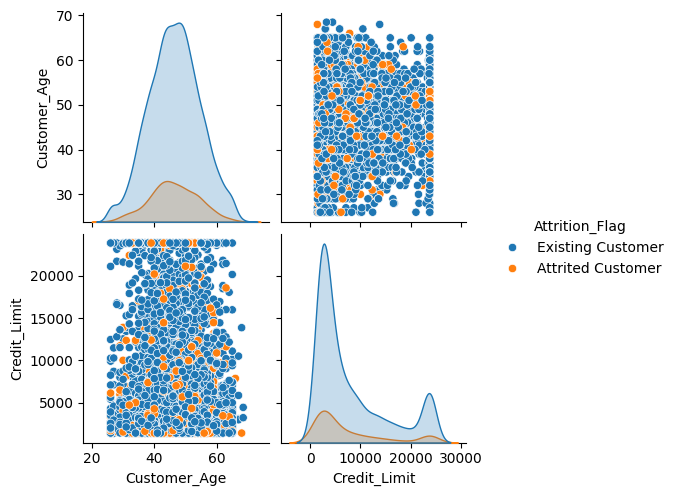

In [29]:
# Pair Plot Analysis
sample_df = df.sample(5000, random_state=42)
sns.pairplot(sample_df, vars=['Customer_Age', 'Credit_Limit'], hue='Attrition_Flag')
plt.show()

In [36]:
# Hypothesis Testing - Mann-Whitney U Test
churned_customers = df[df['Attrition_Flag'] == 'Attrited Customer']['Credit_Limit']
existing_customers = df[df['Attrition_Flag'] == 'Existing Customer']['Credit_Limit']
stat, p_value = mannwhitneyu(churned_customers, existing_customers, alternative='two-sided')
print("Mann-Whitney U Test - Statistic:", stat, "P-Value:", p_value)

Mann-Whitney U Test - Statistic: 6358286.5 P-Value: 2.558936452840966e-07


In [31]:
# Margin of Error Calculation
sample_mean = churned_customers.mean()
sample_std = churned_customers.std()
n = len(churned_customers)
margin_of_error = 1.96 * (sample_std / np.sqrt(n))
print("Margin of Error:", margin_of_error)

Margin of Error: 345.2055963659412


MSE: 49446313.477781065
RMSE: 7031.807269669801


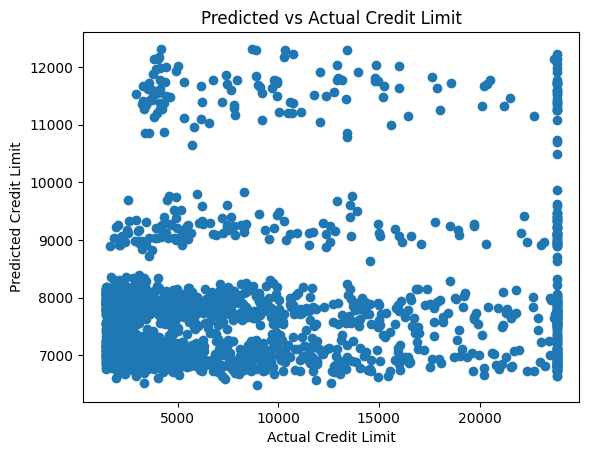

In [32]:
# Prediction - Linear Regression
X = df[['Customer_Age', 'Total_Trans_Amt']]
y = df['Credit_Limit']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

# Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Credit Limit")
plt.ylabel("Predicted Credit Limit")
plt.title("Predicted vs Actual Credit Limit")
plt.show()

In [33]:
# Feature Engineering
df['Age_to_Transaction_Ratio'] = df['Customer_Age'] / df['Total_Trans_Amt']
df['Credit_Utilization'] = df['Total_Revolving_Bal'] / df['Credit_Limit']
print(df[['Age_to_Transaction_Ratio', 'Credit_Utilization']].head())

   Age_to_Transaction_Ratio  Credit_Utilization
0                  0.039336            0.061224
1                  0.037955            0.104651
2                  0.027027            0.000000
3                  0.034159            0.759734
4                  0.049020            0.000000
